In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("house_prices.csv")
df.head()

,Area,Bedrooms,Building_Age,Price
0,152,4,40,282
1,229,4,28,460
2,142,1,14,250
3,64,3,44,50
4,156,5,0,406


<function matplotlib.pyplot.show(close=None, block=None)>

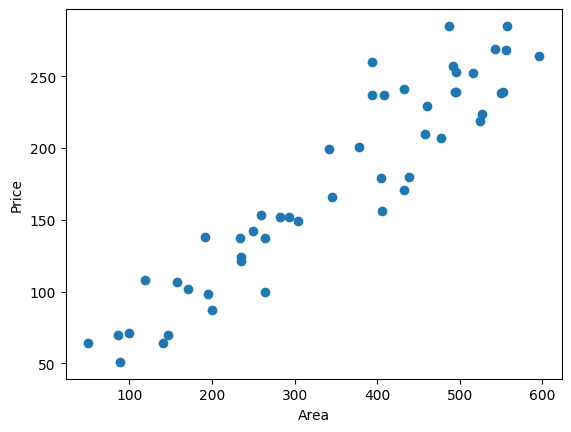

In [10]:
plt.scatter(df.Price, df.Area)
plt.xlabel("Area")
plt.ylabel("Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

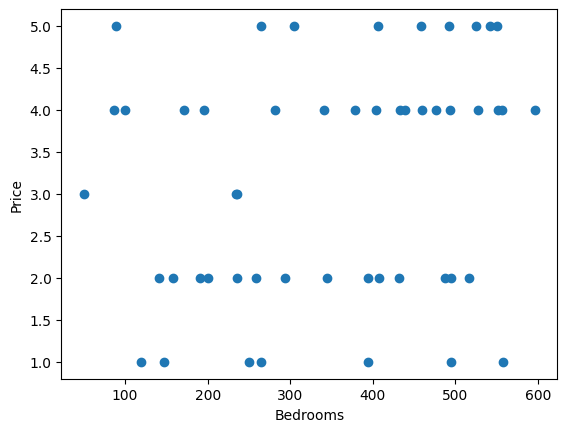

In [11]:
plt.scatter(df.Price, df.Bedrooms)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

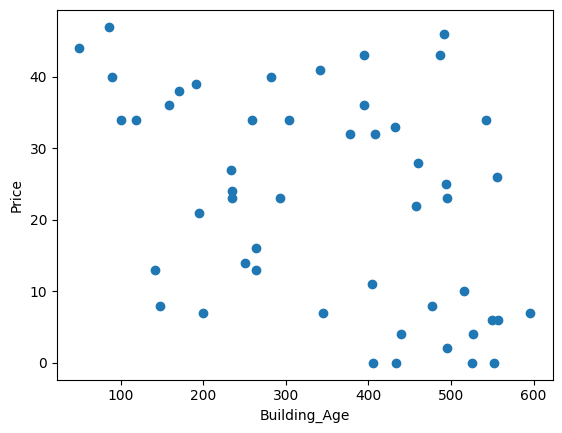

In [13]:
plt.scatter(df.Price, df.Building_Age)
plt.xlabel("Building_Age")
plt.ylabel("Price")
plt.show

In [53]:
X = np.array(df.Area).reshape(-1, 1)
y = np.array(df.Price)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.6503260445995898


In [56]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.6503260445995902


Text(0, 0.5, 'NNLS regression coefficients')

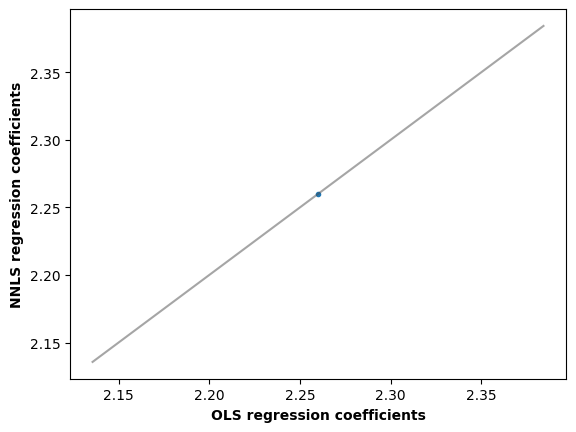

In [58]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="-", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")